# MORPHOLOGICAL TRANSFORMATIONS

https://docs.opencv.org/4.5.3/d9/d61/tutorial_py_morphological_ops.html

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

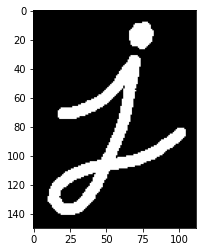

In [2]:
img = cv.imread("img/j.png", 0)
kernel = np.ones((5, 5), np.uint8)
plt.imshow(img, "gray")

## 1. Erosion

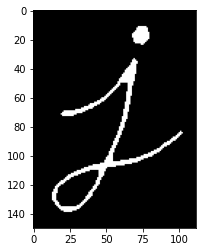

In [3]:
erosion = cv.erode(img, kernel, iterations=1)
plt.imshow(erosion, "gray")

## 2. Dilation

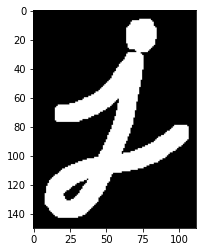

In [4]:
dilation = cv.dilate(img, kernel, iterations=1)
plt.imshow(dilation, "gray")

### Let's add some noise to the image and try erosion -> dilation

### add noise

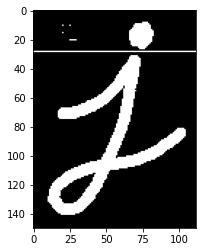

In [5]:
noise = np.copy(img)
noise[10][20] = 255
noise[10][25] = 255
noise[15][20] = 255
noise[20][25:30] = 255
noise[25:30][3] = 255
plt.imshow(noise, "gray")

### remove noise

<Figure size 432x288 with 0 Axes>

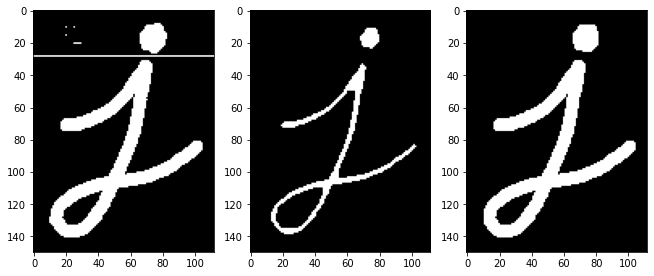

<Figure size 432x288 with 0 Axes>

In [12]:
ero = cv.erode(noise, kernel, iterations=1)
ero_dila = cv.dilate(ero, kernel, iterations=1)
# Increase the size a bit
plt.figure(figsize=(11, 6))
# Display the process
plt.subplot(1, 3, 1), plt.imshow(noise, "gray")
plt.subplot(1, 3, 2), plt.imshow(ero, "gray")
plt.subplot(1, 3, 3), plt.imshow(ero_dila, "gray")
plt.figure() # restore default figure

### There is already a function for this

## 3. Opening (Erosion -> Dilation)

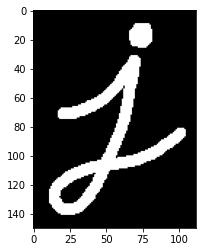

In [13]:
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
plt.imshow(opening, "gray")

## 4. Closing (Dilation -> Erosion)

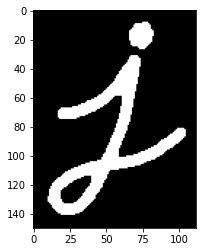

In [14]:
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
plt.imshow(closing, "gray")

## 5. Morphological Gradient (Dilation minus Erosion)

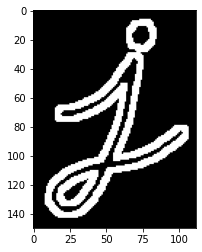

In [15]:
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
plt.imshow(gradient, "gray")

## 6. Top Hat (Image minus Opening)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f48713e0160>)

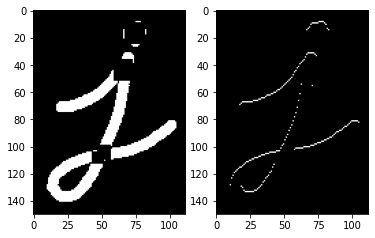

In [27]:
tophat_kernel = np.ones((9, 9), np.uint8)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, tophat_kernel)
tophat_woaw = cv.morphologyEx(img, cv.MORPH_TOPHAT, (9, 9)) # TO RESEARCH:  kernel = (9, 9) ?
plt.subplot(1, 2, 1), plt.imshow(tophat, "gray")
plt.subplot(1, 2, 2), plt.imshow(tophat_woaw, "gray")

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f48701130d0>)

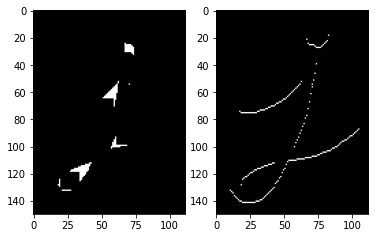

In [33]:
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, tophat_kernel)
blackhat_woaw = cv.morphologyEx(img, cv.MORPH_BLACKHAT, (1, 1)) # TO RESEARCH: kernel = (1, 1) ?
plt.subplot(1, 2, 1), plt.imshow(blackhat, "gray")
plt.subplot(1, 2, 2), plt.imshow(blackhat_woaw, "gray")

## Getting Used Elements of Transformation

### Rectengular Kernel

In [35]:
cv.getStructuringElement(cv.MORPH_RECT, (5, 5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

### Elliptical

In [37]:
cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

### Cross shaped

In [39]:
cv.getStructuringElement(cv.MORPH_CROSS, (5, 5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)